# Project: Wrangling and Analyze Data

In [1]:
# In this section, all the packages deemed necessary for the data analysis process are imported.
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Downloading the file using the request library
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = requests.get(url)
filename = 'image_predictions.csv'
with open(filename , 'wb') as f:
    f.write(file.content)

In [4]:
# read the file I programatically downloaded in the cell above
df_image_predictions = pd.read_csv('image_predictions.csv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# I referred to the resources section to complete the task below. For security purposes, I opted not to show my api keys in this notebook.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit_notify =True, wait_on_rate_limit=True)

tweet_ids = df_twitter_archive.tweet_id.values

with open('tweet_json.txt', 'a') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            pass

In [7]:
# the programatically downloaded json file is accessed as follows
import json

data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [8]:
#Create a DataFrame object 
df_tweets = pd.DataFrame(data)

In [9]:
len(df_tweets)

2327

In [10]:
for col in df_tweets.columns:
    print(col)

contributors
coordinates
created_at
display_text_range
entities
extended_entities
favorite_count
favorited
full_text
geo
id
id_str
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
is_quote_status
lang
place
possibly_sensitive
possibly_sensitive_appealable
quoted_status
quoted_status_id
quoted_status_id_str
quoted_status_permalink
retweet_count
retweeted
retweeted_status
source
truncated
user


In [11]:
#Filter out the columns that aren't required and keep the ones deemed useful 
df_tweets_refined = df_tweets[['id_str','favorite_count', 'retweet_count']]

In [12]:
df_tweets_refined.head()

,id_str,favorite_count,retweet_count
0,892420643555336193,33692,6969
1,892177421306343426,29218,5272
2,891815181378084864,21973,3464
3,891689557279858688,36781,7191
4,891327558926688256,35177,7715


In [13]:
# To ensure no data has been lost when taking subset of df_tweets dataset
len(df_tweets_refined)

2327

## Assessing Data

In the cells below, I plan to perform some visual assessments to confirm if the dataframes have been loaded properly and aslso identify some quality and tidiness issues present in the datasets.

In [14]:
#Visual assessment for the first dataset which is the twitter archive.
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
#Visual assessment for the second dataset which is the images predictions file.
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
#Visual assessment for the third dataset which is the dataset containing the retweets and likes.
df_tweets_refined

,id_str,favorite_count,retweet_count
0,892420643555336193,33692,6969
1,892177421306343426,29218,5272
2,891815181378084864,21973,3464
3,891689557279858688,36781,7191
4,891327558926688256,35177,7715
5,891087950875897856,17745,2586
6,890971913173991426,10328,1647
7,890729181411237888,56654,15679
8,890609185150312448,24422,3604
9,890240255349198849,27841,6067


In the following few cells, various programmatic assessements are performed to have a detailed understanding of the dataset. 

In [17]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_tweets_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id_str            2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [20]:
#check the shape of the datasets to have and idea of the size of data we are dealing with
df_twitter_archive.shape

(2356, 17)

In [21]:
df_image_predictions.shape

(2075, 12)

In [22]:
df_tweets_refined.shape

(2327, 3)

There is a discrepancy in the number of rows in the datasets. I'll fix these issues in the cleaning phase of this project.

In [23]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
1397,699779630832685056,NaN,NaN,2016-02-17 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699779630...,10,10,None,None,None,None,None
2138,670040295598354432,NaN,NaN,2015-11-27 00:43:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",😂😂😂 10/10 for the dog and the owner https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670040295...,10,10,None,None,None,None,None
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
1475,693642232151285760,NaN,NaN,2016-01-31 03:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Freddery. He's a Westminster Toblerone. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,None,None,None,None


In [24]:
df_twitter_archive.isnull().sum()   

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_tweets_refined.isnull().sum()

id_str            0
favorite_count    0
retweet_count     0
dtype: int64

Only the twitter_archive dataset has a significant amount of null entries in some of the columns while the other two have no null entries.

In [27]:
df_twitter_archive.tweet_id.duplicated().sum()

0

While visually scanning the twitter_archive datasets, I've found that some of the dog name entries are a and an. I'll check the how many dogs have such entries

In [28]:
(df_twitter_archive.name == 'a').value_counts()

False    2301
True       55
Name: name, dtype: int64

In [29]:
(df_twitter_archive.name == 'an').value_counts()

False    2349
True        7
Name: name, dtype: int64

55 dogs are named  <b>a</b> and 7 dogs are named  <b>an</b> in the dataset.

In [30]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1915,854365224396361728,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,Labrador_retriever,0.884839,True,Chesapeake_Bay_retriever,0.057565,True,paintbrush,0.005766,False
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True


In [31]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [32]:
df_image_predictions.p1.nunique()

378

In the following cells, the pandas describe() method will be used to have a statistical overview of the dataset we have in hand.

In [33]:
df_twitter_archive.rating_numerator.value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [34]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
df_tweets_refined[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2327.000000,2327.000000
mean,7025.915771,2458.658788
std,10918.673809,4163.665720
min,0.000000,1.000000
25%,1220.500000,492.500000
50%,3037.000000,1144.000000
75%,8564.000000,2844.500000
max,144245.000000,70330.000000


In [37]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
1. In the twitter_archive dataset, timestamp data type is incorrectly set as string but should be datetime. 

2. Filter out retweets and replies from twitter_archive dataset.

3. Null values have been represented as None values.

4. Columns that are not required should be dropped from twitter_archive dataset. 

5. Some dog type entries are in lowercase while others are in uppercase in the p1, p2, and p3 columns of the image_predictions dataset. 

6. Incorrect naming of dogs where some dogs are named 'a' and 'an' in twitter_archive dataset.

7. The data type of tweet_id and id columns in twitter_archive & tweets_refined dataframes respectively doesn't match. This will result in complications when I later plan to tidy up the data by merging these two dataframes.

8. Outliers in the rating_numerator column. There are some exaggerated ratings like 666, 960, and 1776. Majority of the entries are rated between 1 and 14 so any ratings higher than 14 may be incorrectly placed.

9. rating_denominator_values above 10 are likely to be mistakenly entered. (The instructions have stated that allmost all the vdenominator_values are 10)

10. Filter the tweets gathered from twitter api based on the tweet ids in twitter_archive dataset.

11. Datatype of dog_category (which currently doesn't exist) after tidying up the data should be represented as category datatype.


### Tidiness issues
1. Date should be extracted from time_stamp column and placed in a separate column to perform exploratory analysis with ease. 

2. Source column in df_twitter_archive contains html tags which have to be removed.

3. The dog categories doggo, floofer, pupper and puppo should be categorized under a single column.

4. The data extracted from twitter_api should be merged with the twitter_archive dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_refined_clean = df_tweets_refined.copy()

#### 1. In the twitter_archive dataset, timestamp data type is incorrectly set as string but should be datetime.

##### Define: Convert the timestamp data type to the correct format which is the datetime datatype.

##### Code

In [39]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean['timestamp'])

##### Test

In [40]:
df_twitter_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### 2. Filter out retweets and replies from twitter_archive dataset.

##### Define: As per the instruction, we are only required to deal with original tweets. No replies or retweets should be included. So, we will filter out the replies and retweets and keep the original tweets only.

##### Code

In [41]:
cols = ['in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean[cols].isna().all(1)]

##### Test

In [42]:
# Let's check the number of rows to ensure that the changes have taken place
len(df_twitter_archive_clean)

2097

In [43]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

The non-null entries for the columns 'in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id', and 'retweeted_status_user_id' have all been removed ensuring no retweets and replies are in the dataset.

#### 3. Null values have been incorrectly represented as None .

##### Define: The None values are currently being considered as non-null values. To avoid that, we have to correctly label the None values as null.

##### Code

In [44]:
df_twitter_archive_clean.replace('None', np.nan, inplace=True)

##### Test

In [45]:
df_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,NaN,NaN,NaN,NaN
1456,695314793360662529,NaN,NaN,2016-02-04 18:35:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Colin. He really likes green beans. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695314793...,10,10,Colin,NaN,NaN,NaN,NaN
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,NaN,NaN,NaN,NaN
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,NaN,NaN,NaN,pupper,NaN
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,NaN,NaN,NaN,NaN


The None values in doggo, puppo ... etc columns have been replaced with NaN.

#### 4. Columns that are not required should be dropped from twitter_archive dataset.

##### Define: Since we have gotten rid of retweets and replies, there's no use in keeping the columns 'in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id',  'retweeted_status_user_id' and  'retweeted_status_timestamp'.	

##### Code

In [46]:
df_twitter_archive_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id',  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace= True)

##### Test

In [47]:
df_twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


#### 5. Some dog type entries are in lowercase while others are in uppercase in the p1, p2, and p3 columns of the image_predictions dataset. 

##### Define: The dog names within these columns are represented in different cases. Changing all of them to lower is essential so that extracting insights during analysis can be done.

##### Code

In [48]:
df_image_predictions_clean.p1 = df_image_predictions.p1.str.lower()
df_image_predictions_clean.p2 = df_image_predictions.p2.str.lower()
df_image_predictions_clean.p3 = df_image_predictions.p3.str.lower()

##### Test

In [49]:
#welsh_springer_spaniel, the first value in p1 column was not in lower earlier. It has now been fixed.
df_image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True


#### 6. Incorrect naming of dogs where some dogs are named 'a' and 'an' in twitter_archive dataset.

##### Define: The names of 55 dogs was 'a' and 7 dogs had 'n' as a name. This may indicate that they have been incorrectly placed. To be uniform with the other entries, they will be replaced by None.

##### Code

In [50]:
df_twitter_archive_clean.replace(to_replace="a",value=np.nan, inplace=True)
df_twitter_archive_clean.replace(to_replace="an",value=np.nan, inplace=True)

##### Test

In [51]:
(df_twitter_archive_clean.name == 'a').value_counts()

False    2097
Name: name, dtype: int64

In [52]:
(df_twitter_archive_clean.name == 'an').value_counts()

False    2097
Name: name, dtype: int64

#### 7. The data type of tweet_id and id columns in twitter_archive & tweets_refined dataframes respectively doesn't match. This will result in complications when I later plan to tidy up the data by merging these two dataframes.

##### Define: After the retrieval of retweet_count and favorite_count, the tweets_refined table will not be needed. The retweet_count and favorite_count can be merged with twitter_archive dataframe. In order to do that, the ids must match and be of the same datatype.

##### Code

In [53]:
df_twitter_archive_clean.tweet_id.dtype

dtype('int64')

In [54]:
df_tweets_refined_clean.id_str.dtype

dtype('O')

In [55]:
df_tweets_refined_clean.id_str = df_tweets_refined_clean.id_str.astype('int')

##### Test

In [56]:
df_tweets_refined_clean.id_str.dtype

dtype('int64')

#### 8. Outliers in the rating_numerator column. There are some exaggerated ratings like 666, 960, and 1776. Majority of the entries are rated between 1 and 14 so any ratings higher than 14 may be incorrectly placed.

##### Define: By visually and programatically observing the twitter_archive dataset, I've found that all most all of the values are between 1 and 14. Taking this into consideration, values such 666, 960, and 1776 are likely to be an incorrect and placed due to an error while inputting the data.

##### Code

In [57]:
df_twitter_archive_clean = df_twitter_archive_clean.query('1 <= rating_numerator <= 14')

##### Test

In [58]:
df_twitter_archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
Name: rating_numerator, dtype: int64

#### 9. rating_denominator values above 10 are likely to be mistakenly entered. (The instructions have stated that allmost all the denominator_values are 10)

##### Define: As stated in the project instruction, we have been informed that allmost all denominator values are 10. Any value other than 10 especially values such as 170 (which is present in the column) is likely to be a mistake.

##### Code

In [59]:
df_twitter_archive_clean = df_twitter_archive_clean.query('rating_denominator == 10')

##### Test

In [60]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    2074
Name: rating_denominator, dtype: int64

#### 10. Filter the tweets gathered from twitter api based on the tweet ids in twitter_archive dataset.

##### Define: Earlier, the retweets and replies have been filtered out from the twitter_archive dataset. This will now result in disparity between the two datasets, tweets_refined(gathered from the twitter api) and twitter_archive. To avoid that, we have to ensure that the ids present in the two columns have to match.

##### Code

In [61]:
tweet_archive_id_list = df_twitter_archive_clean['tweet_id'].tolist()

In [62]:
df_image_predictions_clean = df_image_predictions_clean[df_image_predictions_clean['tweet_id'].isin(tweet_archive_id_list)]

##### Test

In [63]:
len(df_image_predictions_clean)

1948

We can confirm that the filtering has been done properly because the number of rows have decreased from 2075 to 1948.

## Tidiness

#### 1. Date should be extracted from time_stamp column and placed in a separate column to perform exploratory analysis with ease.

##### Define: In order to perform the exploratory analysis task and identify insights, the separate date column will be a useful addition. To do that, date has to be extracted from the time_stamp field.

##### Code

In [64]:
df_twitter_archive_clean['date'] = df_twitter_archive_clean['timestamp'].dt.date
df_twitter_archive_clean['time'] = df_twitter_archive_clean['timestamp'].dt.time

df_twitter_archive_clean = df_twitter_archive_clean.drop('timestamp', axis=1)

##### Test

In [65]:
df_twitter_archive_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16:23:56


#### 2. The data extracted from twitter_api should be merged with the twitter_archive dataset.

##### Define: The data obtained (retweet count and favorite count) can be merged with twitter_archive dataset. It is not necessary to have them on a separate dataframe.

###### Code

In [66]:
df_tweets_refined_clean = df_tweets_refined_clean.rename(columns={'id_str': 'tweet_id'})

In [67]:
df_tweets_refined_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33692,6969


In [68]:
df_twitter_archive_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16:23:56


In [69]:
df_tweets_refined_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33692,6969


In [70]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweets_refined_clean,
                            on=['tweet_id'], how='left')

##### Test

In [71]:
df_twitter_archive_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16:23:56,33692.0,6969.0


#### 3. The dog categories doggo, floofer, pupper and puppo should be categorized under a single column.

##### Define: The dog categories could be categorized under a single column instead of having their own separate column. This will give the dataset a leaner and cleaner look.

##### Code

In [72]:
# refered to stack overflow to tackle this issue at https://stackoverflow.com/questions/54906740/how-to-merge-string-columns-with-null
df_twitter_archive_clean['dog_category'] = df_twitter_archive_clean[['doggo','floofer','pupper', 'puppo']].apply(lambda val: ', '.join(val.dropna()), axis=1)

In [73]:
df_twitter_archive_clean.replace("", np.nan, inplace=True)

In [74]:
df_twitter_archive_clean.drop(['doggo','floofer','pupper', 'puppo'], axis=1, inplace= True)

##### Test

In [75]:
df_twitter_archive_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,favorite_count,retweet_count,dog_category
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,33692.0,6969.0,NaN


In [76]:
df_twitter_archive_clean.dog_category.value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_category, dtype: int64

## Quality

The last remaining quality issue can now be handled since all the pre-requisite tasks have been completed.

#### 11. Datatype of dog_category (which currently doesn't exist) after tidying up the data should be represented as category datatype.

##### Define: The data type can now be represented in the correct format which will be the 'category' type. Since the values under the dog_category columns are categorical, this will be a perfect fit.

##### Code

In [77]:
df_twitter_archive_clean.dog_category = df_twitter_archive_clean.dog_category.astype('category')

##### Test

In [78]:
df_twitter_archive_clean.dtypes

tweet_id                 int64
source                  object
text                    object
expanded_urls           object
rating_numerator         int64
rating_denominator       int64
name                    object
date                    object
time                    object
favorite_count         float64
retweet_count          float64
dog_category          category
dtype: object

#### 12. Drop unnecessary columns for data analysis pt.2 

##### Define: Earlier some of the columns have been dropped. After the completion of various other cleaning tasks, I noticed some columns will not be useful in the upcoming analysis phase. So, I will be dropping them in the next few cells.

##### Code

In [79]:
df_twitter_archive_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,favorite_count,retweet_count,dog_category
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,33692.0,6969.0,NaN


In [80]:
#dropping columns from the df_twitter_archive_clean column
df_twitter_archive_clean.drop(['source','text','expanded_urls', 'time'], axis=1, inplace= True)

In [81]:
df_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [82]:
#dropping columns from the df_twitter_archive_clean column
df_image_predictions_clean.drop(['jpg_url','p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace= True)

I have opted to only keep the p1 prediction values because p1 is the one with highest accuracy prediction.

##### Test

In [83]:
df_twitter_archive_clean.head(1)

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN


In [84]:
df_image_predictions_clean.head(1)

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True


I will now merge these two datsets resulting in the master dataset.

## Tidiness

#### 5. Create a single clean master dataset comprising of the columns deemed useful for analysis.

##### Define: The cleaned up datasets can be merged into a single master dataset .

##### Code

In [85]:
df_twitter_archive_clean.head(1)

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN


In [86]:
df_image_predictions_clean.head(1)

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True


In [87]:
df_master = pd.merge(df_twitter_archive_clean, df_image_predictions_clean,
                            on=['tweet_id'], how='left')

##### Test

In [88]:
df_master.head(5)

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category,img_num,p1,p1_conf,p1_dog
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN,1.0,orange,0.097049,False
1,892177421306343426,13,10,Tilly,2017-08-01,29218.0,5272.0,NaN,1.0,chihuahua,0.323581,True
2,891815181378084864,12,10,Archie,2017-07-31,21973.0,3464.0,NaN,1.0,chihuahua,0.716012,True
3,891689557279858688,13,10,Darla,2017-07-30,36781.0,7191.0,NaN,1.0,paper_towel,0.170278,False
4,891327558926688256,12,10,Franklin,2017-07-29,35177.0,7715.0,NaN,2.0,basset,0.555712,True


In [89]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id              2074 non-null int64
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  1426 non-null object
date                  2074 non-null object
favorite_count        2066 non-null float64
retweet_count         2066 non-null float64
dog_category          335 non-null category
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null object
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 196.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
df_master.head()

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category,img_num,p1,p1_conf,p1_dog
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN,1.0,orange,0.097049,False
1,892177421306343426,13,10,Tilly,2017-08-01,29218.0,5272.0,NaN,1.0,chihuahua,0.323581,True
2,891815181378084864,12,10,Archie,2017-07-31,21973.0,3464.0,NaN,1.0,chihuahua,0.716012,True
3,891689557279858688,13,10,Darla,2017-07-30,36781.0,7191.0,NaN,1.0,paper_towel,0.170278,False
4,891327558926688256,12,10,Franklin,2017-07-29,35177.0,7715.0,NaN,2.0,basset,0.555712,True


In [91]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
df_twitter_data = pd.read_csv('twitter_archive_master.csv')

In [93]:
df_twitter_data.head()

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category,img_num,p1,p1_conf,p1_dog
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN,1.0,orange,0.097049,False
1,892177421306343426,13,10,Tilly,2017-08-01,29218.0,5272.0,NaN,1.0,chihuahua,0.323581,True
2,891815181378084864,12,10,Archie,2017-07-31,21973.0,3464.0,NaN,1.0,chihuahua,0.716012,True
3,891689557279858688,13,10,Darla,2017-07-30,36781.0,7191.0,NaN,1.0,paper_towel,0.170278,False
4,891327558926688256,12,10,Franklin,2017-07-29,35177.0,7715.0,NaN,2.0,basset,0.555712,True


### 1. Identify if retweet count and favorite_count are directly proportional

In [94]:
df_twitter_data['favorite_count'].corr(df_twitter_data['retweet_count'])

0.9257730049672164

This shows that there is a high positive correlation between the two which signifies that when higher retweet count results in the tweet becoming more liked (high favorite count).

### 2. What is the most common rating given to the dogs?

In [95]:
df_twitter_data.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

We can see that most ratings range between 9 and 12, I'll filter those and perform the analysis.

In [96]:
tweets_filtered = df_twitter_data.query('9 <= rating_numerator <= 12')

In [97]:
len(tweets_filtered)

1487

In [98]:
tweets_filtered.groupby('rating_numerator')['tweet_id'].count()

rating_numerator
9     152
10    436
11    413
12    486
Name: tweet_id, dtype: int64

The most common rating rating given to the dogs is 12. 

### 3. What is the most liked and least liked dog breed?

In [99]:
df_sorted_by_favorite_count = df_twitter_data.sort_values(by='favorite_count', ascending=False)

In [100]:
# I'll rename the p1 column to dog_breed to be more descriptive
df_sorted_by_favorite_count = df_sorted_by_favorite_count.rename(columns={'p1': 'dog_breed'})

In [101]:
df_sorted_by_favorite_count[['dog_breed', 'favorite_count']].head()

,dog_breed,favorite_count
818,labrador_retriever,144245.0
324,lakeland_terrier,123675.0
416,chihuahua,111176.0
115,french_bulldog,108489.0
856,eskimo_dog,106778.0


The most liked tweet is of a Labrador Retriever.

In [102]:
df_least_liked = df_twitter_data.sort_values(by='favorite_count', ascending=True)

In [103]:
df_least_liked = df_least_liked.rename(columns={'p1': 'dog_breed'})

In [104]:
df_least_liked[['dog_breed', 'favorite_count']].head()

,dog_breed,favorite_count
2057,english_setter,66.0
2069,miniature_pinscher,88.0
2038,curly-coated_retriever,90.0
2060,pug,92.0
2046,black-and-tan_coonhound,93.0


The least liked tweet is of English setter breed.

### 4. How accurate is the image prediction algorithm in predicting a dog breed?

In [105]:
df_twitter_data.head(1)

,tweet_id,rating_numerator,rating_denominator,name,date,favorite_count,retweet_count,dog_category,img_num,p1,p1_conf,p1_dog
0,892420643555336193,13,10,Phineas,2017-08-01,33692.0,6969.0,NaN,1.0,orange,0.097049,False


In [106]:
df_twitter_data.p1_dog.value_counts()

True     1446
False     502
Name: p1_dog, dtype: int64

In [107]:
df_true = df_twitter_data[df_twitter_data['p1_dog'] == True]
df_false = df_twitter_data[df_twitter_data['p1_dog'] == False]

In [108]:
true_prediction_count = len(df_true)
overall_prediction_count = len(df_true) + len(df_false) 
true_prediction_percentage = (true_prediction_count / overall_prediction_count) * 100

In [109]:
round(true_prediction_percentage, 2)

74.23

The image prediction algorithm has been able to correctly label 74.23% of the tweets as dog breeds.  

##### Insights:
1. There is a high positive correlation between the number of retweets and likes. This signifies that higher retweet count results in the tweet becoming more liked (high favorite count).

2. The most common rating rating given to the dogs is 12.

3. The most liked tweet is of a Labrador Retriever.

4. The least liked tweet is of English setter breed.

5. The image prediction algorithm has been able to correctly label 74.23% of the tweets as dog breeds.  

### Visualization

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


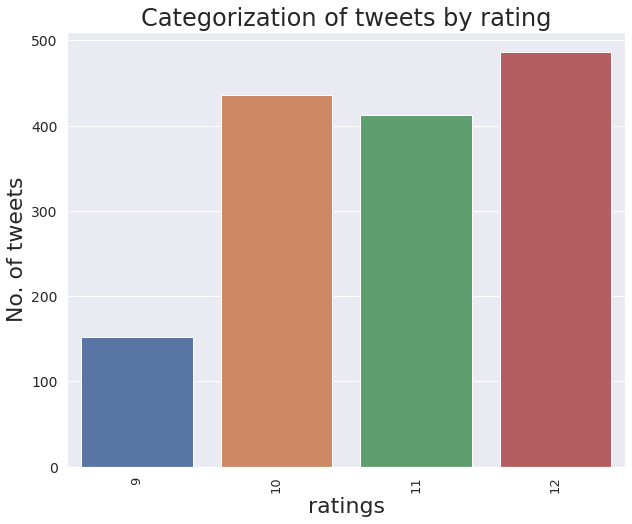

In [114]:
# plot the distributin of tweets by ratings.
# I referred this link; https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/ to manipulate the size of the plot.
sns.countplot(tweets_filtered["rating_numerator"])
plt.title('Categorization of tweets by rating', fontsize=24)
plt.ylabel('No. of tweets', fontsize=22)
plt.xlabel('ratings', fontsize=22)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(10,8)})
plt.savefig('tweets_ratings_count.png')
plt.show()

The most common rating is 12 followed by 10, 11 and 9.

In [111]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


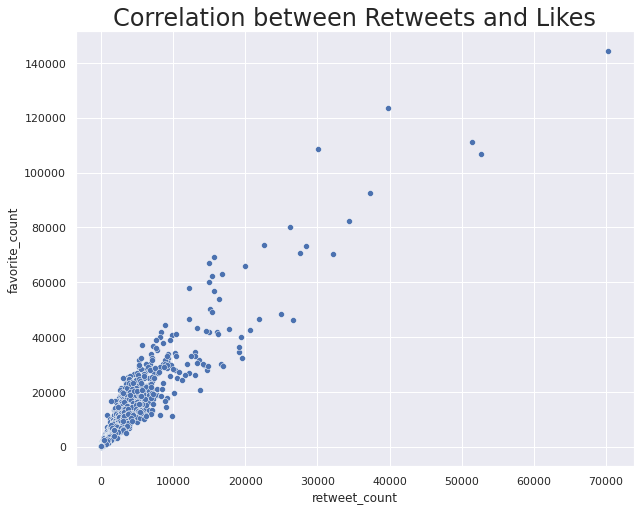

In [112]:
# Correlation between retweets and likes
sns.scatterplot(x = 'retweet_count', y = 'favorite_count', data = df_twitter_data);
sns.set(font_scale = 2)

plt.title('Correlation between Retweets and Likes', fontsize = 24)
plt.savefig('retweet_like_correlation.png')
plt.show()

There is a high postitive correlation between retweets and likes.